# Pandas and Matplotlib Homework

In [1]:
#load the libraries using the normal convention
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
##prevent plotting errors
%matplotlib inline

/anaconda3/envs/itp_2018/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/anaconda3/envs/itp_2018/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
#Load our excel files of interest into pandas
NHL_Goalies = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname=0) 
GAA_ = pd.read_excel('NHLGoalies2016_2017.xls',na_values='',sheetname='5vs5')

/anaconda3/envs/itp_2018/lib/python3.6/site-packages/pandas/io/excel.py:329: FutureWarning: The `sheetname` keyword is deprecated, use `sheet_name` instead
  **kwds)


#Appendix:
 1. DF = Pandas DataFrame
 2. NHL_Goalies DF = NHL_Goalies 
 3. GAA_ DF = GAA_

### Q1A) Create a new DF (*called NHL_Ones*) by:
#### Filtering the correct DF for Goalies that played 1 game <font color='red'> (GP = Games played)</font>

Notes: How would you find the 'GP' column in these files? Review from Pandas Lecture

In [3]:
# Answer 1A:
NHL_Ones = pd.DataFrame(data = NHL_Goalies.loc[NHL_Goalies['GP'] == 1])
print(NHL_Ones.head())

   Last Name First Name Team         DOB  Birth City S/P Cntry  Nat  Ht   Wt  \
1      Alves      Jorge  CAR  1979-01-30      Boston  MA   USA  USA  69  185   
13  Campbell       Jack  LAK  1992-01-09  Port Huron  MI   USA  USA  74  197   
14    Comrie       Eric  WPG  1995-07-06    Edmonton  AB   CAN  CAN  73  175   
16    Copley    Pheonix  STL  1992-01-18  North Pole  AK   USA  USA  76  196   
22  Driedger      Chris  OTT  1994-05-18    Winnipeg  MB   CAN  CAN  76  205   

    ...    Cap Hit        Pace  1st  2nd  3rd  Star  GPS  Ginj  Injuries  CHIP  
1   ...        NaN    0.000000  NaN  NaN  NaN   NaN  0.0   NaN       NaN        
13  ...        NaN   96.000000  NaN  NaN  NaN   NaN  0.1   NaN       NaN        
14  ...   645000.0  124.451939  NaN  NaN  NaN   NaN  0.2   NaN       NaN        
16  ...   708750.0  104.864253  NaN  NaN  NaN   NaN -0.1   NaN       NaN        
22  ...   755000.0  123.000000  NaN  NaN  NaN   NaN -0.2   NaN       NaN        

[5 rows x 111 columns]


In [4]:
NHL_Goalies.GP.head()

0    61
1     1
2    66
3    40
4     5
Name: GP, dtype: int64

 ## Q1B) 
 #### A. Find the value of the minimum Salary for the entire dataset 
 #### B. Replace the missing values from the NHL_Ones DF with this
 #### C. Create a new DF after replacement by **adding** a column called  "Adjusted_Salary"
 #### D. I would like to only see the old "Salary" column and the "Adjusted Salary" column from the new Dataframe

#### Notes:
1. Note where the minimum Salary value is coming & where you are going to assign it to
2. Review notes from pandas **replacement**
3. Look up Numpy definition for null
4. Look up Pandas **Series** Naming 
5. Review concat function in Pandas
6. Review how to slice columns

In [5]:
# Answer 1B, A. :

min_salary = NHL_Goalies.Salary.min(skipna=True)
print(min_salary)

575000.0


In [6]:
# Answer 1B, B. :

NHL_Ones = NHL_Ones.replace('NaN',np.nan)
NHL_Ones_Adj_Sal = NHL_Ones.Salary.replace(np.nan, min_salary)
NHL_Ones_Adj_Sal.head()

1     575000.0
13    575000.0
14    575000.0
16    708750.0
22    780000.0
Name: Salary, dtype: float64

In [7]:
# Answer 1B, C. :

NHL_Ones['Adjusted_Salary'] = NHL_Ones_Adj_Sal
NHL_Ones.head()

,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP,Adjusted_Salary
1,Alves,Jorge,CAR,1979-01-30,Boston,MA,USA,USA,69,185,...,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,,575000.0
13,Campbell,Jack,LAK,1992-01-09,Port Huron,MI,USA,USA,74,197,...,96.000000,NaN,NaN,NaN,NaN,0.1,NaN,NaN,,575000.0
14,Comrie,Eric,WPG,1995-07-06,Edmonton,AB,CAN,CAN,73,175,...,124.451939,NaN,NaN,NaN,NaN,0.2,NaN,NaN,,575000.0
16,Copley,Pheonix,STL,1992-01-18,North Pole,AK,USA,USA,76,196,...,104.864253,NaN,NaN,NaN,NaN,-0.1,NaN,NaN,,708750.0
22,Driedger,Chris,OTT,1994-05-18,Winnipeg,MB,CAN,CAN,76,205,...,123.000000,NaN,NaN,NaN,NaN,-0.2,NaN,NaN,,780000.0


In [8]:
# Answer 1B, D. :

NHL_Ones_Salaries = pd.concat((NHL_Ones.Salary, NHL_Ones.Adjusted_Salary), axis=1)
NHL_Ones_Salaries

,Salary,Adjusted_Salary
1,NaN,575000.0
13,NaN,575000.0
14,575000.0,575000.0
16,708750.0,708750.0
22,780000.0,780000.0
27,650000.0,650000.0
29,925000.0,925000.0
32,NaN,575000.0
42,575000.0,575000.0
50,673334.0,673334.0


### Q2) A. Subset the NHL goalies data to include Goalies that played in more than 25 games AND have a GAA lower than 3.00 and store the New DF as 'workhorse'


Notes: 
1. Review notes from Pandas Lecture on creating masks
2. Internet search for Multiple Boolean indexing on multiple columns in a Pandas DataFrame

In [9]:
workhorse = pd.DataFrame(data = NHL_Goalies.loc[(NHL_Goalies.GP > 25) & (NHL_Goalies.GAA < 3.00)])
workhorse.head()

,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
0,Allen,Jake,STL,1990-08-07,Fredericton,NB,CAN,CAN,74,203,...,2350000.0,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,
2,Andersen,Frederik,TOR,1989-10-02,Herning,NaN,DNK,DNK,76,230,...,5000000.0,118.931391,9.0,6.0,6.0,21.0,13.1,2.0,Upper body,121951
3,Anderson,Craig,OTT,1981-05-21,Park Ridge,IL,USA,USA,74,187,...,4200000.0,114.858819,8.0,2.0,5.0,15.0,9.2,2.0,Lower body,102439
5,Bernier,Jonathan,ANA,1988-08-07,Laval,QC,CAN,CAN,72,184,...,4150000.0,113.938340,5.0,0.0,2.0,7.0,6.0,3.0,Upper body,151829
9,Bishop,Ben,"TBL, LAK",1986-11-21,Denver,CO,USA,USA,79,216,...,5950000.0,108.466747,0.0,1.0,5.0,6.0,5.7,9.0,Lower body,653049


### Q3. Create 2 python functions that: 
<br> </br>
#### A. Creates/*Returns* a new DataFrame that displays the number of missing values in every column. 
#### This new DataFrame has one new column named "Missing" with the sum of the missing values from the columns

### Notes 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
** One Proposed method:**
1. Create a pandas series object from the sum of the nulls in every column (review class notes)
2. Convert the series object to a DataFrame and pass the list of column names from the input DataFrame as the index. (read Pandas Help online)
3. During the conversion of the series object to a DataFrame pass a columns argument to create a name for the new Output DataFrame's Column.

### Expected Output:
<img src='Missing_cols_expectedoutput.png'>

In [10]:
# Answer 3A: CODE HERE; Please comment each part

def return_missing_values(df):                      # create function with input 'df'
    null_sum_series = pd.Series(df.isnull().sum())  # create a series consisting of the sum of the null values in each column
    null_sum_df = pd.DataFrame(null_sum_series)     # convert series into a dataframe
    null_sum_df.columns = ['Missing']               # label the column of sums as 'Missing' (the column names were automatically assigned as the index values)
    return df                  

return_missing_values(NHL_Goalies)                  # call function for NHL_Goalies dataframe

,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
0,Allen,Jake,STL,1990-08-07,Fredericton,NB,CAN,CAN,74,203,...,2350000.0,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,
1,Alves,Jorge,CAR,1979-01-30,Boston,MA,USA,USA,69,185,...,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,
2,Andersen,Frederik,TOR,1989-10-02,Herning,NaN,DNK,DNK,76,230,...,5000000.0,118.931391,9.0,6.0,6.0,21.0,13.1,2.0,Upper body,121951
3,Anderson,Craig,OTT,1981-05-21,Park Ridge,IL,USA,USA,74,187,...,4200000.0,114.858819,8.0,2.0,5.0,15.0,9.2,2.0,Lower body,102439
4,Bachman,Richard,VAN,1987-07-25,Salt Lake City,UT,USA,USA,70,183,...,575000.0,113.421038,1.0,0.0,1.0,2.0,1.1,NaN,NaN,
5,Bernier,Jonathan,ANA,1988-08-07,Laval,QC,CAN,CAN,72,184,...,4150000.0,113.938340,5.0,0.0,2.0,7.0,6.0,3.0,Upper body,151829
6,Berra,Reto,FLA,1987-01-03,Bulach,NaN,CHE,CHE,76,210,...,1450000.0,108.457976,NaN,NaN,NaN,NaN,0.2,NaN,NaN,
7,Berube,Jean-Francois,NYI,1991-07-13,Repentigny,QC,CAN,CAN,73,177,...,675000.0,114.005505,0.0,1.0,1.0,2.0,0.8,NaN,NaN,
8,Bibeau,Antoine,TOR,1994-05-01,Victoriaville,QC,CAN,CAN,75,210,...,655000.0,130.294240,NaN,NaN,NaN,NaN,0.4,NaN,NaN,
9,Bishop,Ben,"TBL, LAK",1986-11-21,Denver,CO,USA,USA,79,216,...,5950000.0,108.466747,0.0,1.0,5.0,6.0,5.7,9.0,Lower body,653049


#### B. Creates a new *column* called 'missing_values' in the input DF that sums the missing values in each row.

### Notes: 
***Function takes one argument: An input DataFrame***
<br> </br>
<br> </br>
Review the Column creation method in lecture and the axis arguments needed

### Expected Output:
<img src= 'missingrows_expectedoutput.png'>

In [11]:
#Answer 3B here; Please comment each part

def missing_values_col(df):                         
    null_sum_series = pd.Series(df.isnull().sum(axis=1))  # create series of sums of missing values, setting axis to 1 sums by row instead of column
    null_sum_df = pd.DataFrame(null_sum_series)           # convert series into dataframs
    null_sum_df.columns = ['Missing']                     # label column of sums as 'Missing'
    df = pd.concat((df, null_sum_df.Missing), axis=1)     # add 'Missing' column from new df to old dataframe, setting axis to 1 adds missing as a column
    return df                                             # return old dataframe with new column                  

missing_values_col(NHL_Goalies)




,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP,Missing
0,Allen,Jake,STL,1990-08-07,Fredericton,NB,CAN,CAN,74,203,...,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,,3
1,Alves,Jorge,CAR,1979-01-30,Boston,MA,USA,USA,69,185,...,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,,18
2,Andersen,Frederik,TOR,1989-10-02,Herning,NaN,DNK,DNK,76,230,...,118.931391,9.0,6.0,6.0,21.0,13.1,2.0,Upper body,121951,2
3,Anderson,Craig,OTT,1981-05-21,Park Ridge,IL,USA,USA,74,187,...,114.858819,8.0,2.0,5.0,15.0,9.2,2.0,Lower body,102439,1
4,Bachman,Richard,VAN,1987-07-25,Salt Lake City,UT,USA,USA,70,183,...,113.421038,1.0,0.0,1.0,2.0,1.1,NaN,NaN,,3
5,Bernier,Jonathan,ANA,1988-08-07,Laval,QC,CAN,CAN,72,184,...,113.938340,5.0,0.0,2.0,7.0,6.0,3.0,Upper body,151829,1
6,Berra,Reto,FLA,1987-01-03,Bulach,NaN,CHE,CHE,76,210,...,108.457976,NaN,NaN,NaN,NaN,0.2,NaN,NaN,,8
7,Berube,Jean-Francois,NYI,1991-07-13,Repentigny,QC,CAN,CAN,73,177,...,114.005505,0.0,1.0,1.0,2.0,0.8,NaN,NaN,,3
8,Bibeau,Antoine,TOR,1994-05-01,Victoriaville,QC,CAN,CAN,75,210,...,130.294240,NaN,NaN,NaN,NaN,0.4,NaN,NaN,,7
9,Bishop,Ben,"TBL, LAK",1986-11-21,Denver,CO,USA,USA,79,216,...,108.466747,0.0,1.0,5.0,6.0,5.7,9.0,Lower body,653049,0


### Q4) Matplotlib Question Plot in one figure and 2 side by side plots:
<br> </br>
#### A. Plot the histogram of the all the GAA of the NHL_Goalies DF  AND the goalies that played in more than 25 games with a GAA < 3.00, 
#### B. Label the Titles of the plots differently (*ie EntireSet + Subset*)
#### C. Change the color of one of the plots from the default

# Notes

1. convert your column of interest into a NumPY array (look up online for usage)
2. Review: https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html

Text(0.5,1,'Subset')

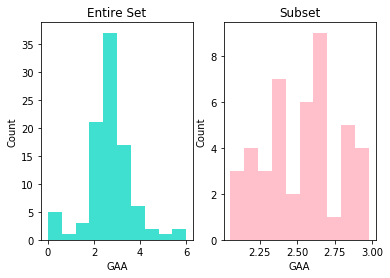

In [12]:
# create an array using the data from the GAA column of the NHL Goalies df
GAA_array = np.array(NHL_Goalies.GAA)       

# create another array using the data from the GAA column of the workhorse df
GAA_workhorse_array = np.array(workhorse.GAA) 

plt.figure()                                    # create a figure that will hold the plots

plt.subplot(1,2,1)                              # define that this is the first plot in a 1x2 grid of plots
plt.hist(GAA_array, color='turquoise')          # create a histogram with the GAA array data, change color
plt.xlabel('GAA')     
plt.ylabel('Count')                             # label x and y axes, add title
plt.title('Entire Set')

plt.subplot(1,2,2)                              # define that this is the second plot in the 1x2 grid
plt.hist(GAA_workhorse_array, color='pink')     # create a histogram with the GAA workhorse array data, change color
plt.xlabel('GAA')
plt.ylabel('Count')                             # label x and y axes, add title
plt.title('Subset')

### Q5) GroupBy Question
##### 1. Subset the NHL_Goalies DataFrame where Injuries is not known <font color='red'>(Injuries=NaN)</font>; 
##### 2. Use a Merge with the GAA_  DF to produce a NEW DF (*called mergedDF*) 
###### *** USE A JOIN THAT PRESERVES ORDER AND USES THE INTERSECTION OF KEYS***
###### *** USE BOTH THE LEFT AND RIGHT INDEXES AS JOIN KEYS***
##### 3. From the mergedDF keep FirstName/LastName/Team/Cntry/ SV% /GA/GAA/ TOI (note one copy for any duplicate column)
##### 4. GroupBy country on mergedDF and aggregate The Means, Mins, and Maximum of the kept columns
#### 5. Create a dataframe of the <font color='red'>TOI </font>groupby object and write it to a comma seperated value file called ('TOI_2017.csv')

## Notes:

1. Review how to create selection criteria and how aggs/joins work from lecture notes;
2. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.to_csv.html
3. https://stackoverflow.com/questions/14734533/how-to-access-pandas-groupby-dataframe-by-key
4. https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.get.html

In [13]:
# Q5, part 1:

unknown_injuries = NHL_Goalies[NHL_Goalies.Injuries.isna()]

unknown_injuries.head()

,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
0,Allen,Jake,STL,1990-08-07,Fredericton,NB,CAN,CAN,74,203,...,2350000.0,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,
1,Alves,Jorge,CAR,1979-01-30,Boston,MA,USA,USA,69,185,...,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,
4,Bachman,Richard,VAN,1987-07-25,Salt Lake City,UT,USA,USA,70,183,...,575000.0,113.421038,1.0,0.0,1.0,2.0,1.1,NaN,NaN,
6,Berra,Reto,FLA,1987-01-03,Bulach,NaN,CHE,CHE,76,210,...,1450000.0,108.457976,NaN,NaN,NaN,NaN,0.2,NaN,NaN,
7,Berube,Jean-Francois,NYI,1991-07-13,Repentigny,QC,CAN,CAN,73,177,...,675000.0,114.005505,0.0,1.0,1.0,2.0,0.8,NaN,NaN,


In [14]:
# Q5, part 2:
mergedDF = pd.merge(GAA_, unknown_injuries, left_index=True, right_index=True, how='inner')
mergedDF.head()

,First Name_x,Last Name_x,Team_x,TOI,GAA_x,GSAA_x,SV%_x,TrueSV%_x,ExpSV%_x,xGSAA_x,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
0,Allen,Jake,STL,2692.83,2.139014,1.718026,0.924588,0.959630,0.923551,1.32,...,2350000.0,104.033662,9.0,7.0,6.0,22.0,9.8,NaN,NaN,
1,Alves,Jorge,CAR,0.13,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,...,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,NaN,NaN,
4,Bachman,Richard,VAN,244.84,2.695638,-0.330082,0.920863,0.958015,0.907626,1.84,...,575000.0,113.421038,1.0,0.0,1.0,2.0,1.1,NaN,NaN,
6,Berra,Reto,FLA,248.43,3.381234,-5.095608,0.879310,0.936364,0.901034,-2.52,...,1450000.0,108.457976,NaN,NaN,NaN,NaN,0.2,NaN,NaN,
7,Berube,Jean-Francois,NYI,444.72,3.103076,-5.037692,0.901709,0.942211,0.925726,-5.62,...,675000.0,114.005505,0.0,1.0,1.0,2.0,0.8,NaN,NaN,


In [15]:
# Q5, part 3:

mergedDF = mergedDF.loc[:,['First Name_x', 'Last Name_x', 'Team_x', 'Cntry', 'SV%_x', 'GA_x', 'GAA_x', 'TOI']]
mergedDF.head()

,First Name_x,Last Name_x,Team_x,Cntry,SV%_x,GA_x,GAA_x,TOI
0,Allen,Jake,STL,CAN,0.924588,96,2.139014,2692.83
1,Alves,Jorge,CAR,USA,0.000000,0,0.000000,0.13
4,Bachman,Richard,VAN,USA,0.920863,11,2.695638,244.84
6,Berra,Reto,FLA,CHE,0.879310,14,3.381234,248.43
7,Berube,Jean-Francois,NYI,CAN,0.901709,23,3.103076,444.72


In [16]:
# Q5, part 4:

mergedDF.groupby('Cntry').agg(['mean','min','max'])

SV%_x                           GA_x              GAA_x            \
           mean       min       max       mean min  max      mean       min   
Cntry                                                                         
CAN    0.908457  0.714286  1.000000  44.160000   0  126  2.717212  0.000000   
CHE    0.879310  0.879310  0.879310  14.000000  14   14  3.381234  3.381234   
CZE    0.945585  0.865672  1.000000  25.500000   0   93  1.522106  0.000000   
DEU    0.930367  0.920918  0.939815  59.500000  26   93  2.025291  1.612686   
FIN    0.917193  0.907975  0.926978  55.000000  30   93  2.485414  2.179960   
LVA    1.000000  1.000000  1.000000   0.000000   0    0  0.000000  0.000000   
RUS    0.923759  0.923759  0.923759  86.000000  86   86  2.335254  2.335254   
SVK    0.921984  0.918675  0.925293  68.500000  54   83  2.257327  1.906169   
SWE    0.896986  0.853448  0.928571   6.000000   2   17  3.163009  1.607286   
USA    0.866362  0.000000  1.000000  24.142857   0  106  1.804150  0.000000   

                         TOI                    
            max         mean      min      max  
Cntry                                           
CAN    7.402838  1147.538400     6.97  3417.26  
CHE    3.381234   248.430000   248.43   248.43  
CZE    3.552164   594.537500     7.39  2200.09  
DEU    2.437895  1628.095000   967.33  2288.86  
FIN    2.782630  1377.347500   646.87  2559.68  
LVA    0.000000    11.450000    11.45    11.45  
RUS    2.335254  2209.610000  2209.61  2209.61  
SVK    2.608486  1927.335000  1242.10  2612.57  
SWE    4.829317    95.775000    47.10   211.21  
USA    3.590664   596.937857     0.13  2686.76

In [17]:
# Q5, part 5:

TOI_df = mergedDF.groupby('Cntry').agg({'TOI':['mean','min','max']})          
                      
TOI_df.to_csv('TOI_2017.csv')

# Q6) Write a function(s)  
## that subsets a dataframe by removing rows that are WITHIN the InterQuartile Region of a specified column
<br> </br>
### The function takes as input 
##### A: Pandas_Dataframe (For example use NHL_GoaliesDF)
##### B. Column name
### Add a condition that returns an error if the Column Name chosen is not:
##### A. Numeric Dtype
##### B. Does not exist in the Numeric Columns
### The output is a DataFrame that removes rows outside of the specified columns IQR
<br> </br>
<font color='red'>**You can use smaller helper functions **<font>
<br> </br>
See --> <href>=https://en.wikipedia.org/wiki/Interquartile_range</href>
#hint: There are several pandas subfunctions that can be useful

In [29]:
from pandas.api.types import is_numeric_dtype
import sys

# create function that passes through a data frame and a column from the data frame
def IQR(df, col):
    
    # sort out non-numeric data types
    if is_numeric_dtype(df[col]) == False:
        sys.exit('column type is not numeric')

    # create dataframe to hold data less than the 75% and greater than the 25%  
    inner = pd.DataFrame(data=df[(df[col] < (df[col].quantile(0.75))) & (df[col] > (df[col].quantile(0.25)))])
   
    # return dataframe created above
    return inner
                
                
IQR(NHL_Goalies, 'GPS')


,Last Name,First Name,Team,DOB,Birth City,S/P,Cntry,Nat,Ht,Wt,...,Cap Hit,Pace,1st,2nd,3rd,Star,GPS,Ginj,Injuries,CHIP
4,Bachman,Richard,VAN,1987-07-25,Salt Lake City,UT,USA,USA,70,183,...,575000.0,113.421038,1.0,0.0,1.0,2.0,1.1,NaN,NaN,
5,Bernier,Jonathan,ANA,1988-08-07,Laval,QC,CAN,CAN,72,184,...,4150000.0,113.938340,5.0,0.0,2.0,7.0,6.0,3.0,Upper body,151829
7,Berube,Jean-Francois,NYI,1991-07-13,Repentigny,QC,CAN,CAN,73,177,...,675000.0,114.005505,0.0,1.0,1.0,2.0,0.8,NaN,NaN,
8,Bibeau,Antoine,TOR,1994-05-01,Victoriaville,QC,CAN,CAN,75,210,...,655000.0,130.294240,NaN,NaN,NaN,NaN,0.4,NaN,NaN,
9,Bishop,Ben,"TBL, LAK",1986-11-21,Denver,CO,USA,USA,79,216,...,5950000.0,108.466747,0.0,1.0,5.0,6.0,5.7,9.0,Lower body,653049
11,Brossoit,Laurent,EDM,1993-03-23,Port Alberni,BC,CAN,CAN,75,204,...,750000.0,110.633178,1.0,1.0,0.0,2.0,1.2,NaN,NaN,
15,Condon,Mike,"PIT, OTT",1990-04-27,Holliston,MA,USA,USA,74,197,...,575000.0,112.079733,9.0,1.0,4.0,14.0,6.8,NaN,NaN,
17,Coreau,Jared,DET,1991-11-05,Perth,ON,CAN,CAN,78,220,...,612500.0,108.674473,1.0,1.0,1.0,3.0,1.0,NaN,NaN,
19,Darling,Scott,CHI,1988-12-22,Newport News,VA,USA,USA,78,232,...,587500.0,109.476386,5.0,5.0,5.0,15.0,6.2,5.0,Upper body,35823.2
20,Dell,Aaron,SJS,1989-05-04,Airdrie,AB,CAN,CAN,72,205,...,625000.0,114.105623,3.0,3.0,2.0,8.0,4.2,NaN,NaN,


***For any questions regarding this assignment please email SAMSON: <br> </br><font color='green'>sjacob210@gmail.com ***</font>